In [20]:
import pandas as pd

df1 = pd.read_excel('xlsx_/nonfulltimeDF.xlsx')
df2 = pd.read_excel('xlsx_/fulltimeDF.xlsx')

In [22]:
df2.head()

,dong,highway,ffnc,nfnc,nfc,fsnc,fsc,nsnc,nsc,affnc,anfnc,anfc,afsnc,afsc,ansnc,ansc,population
0,가락1동,0.0,0.225806,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.077419,0.00,0.000000,0.047561,0.022764,0.012,0.034783,0.155581
1,가락2동,0.0,0.161290,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.038710,0.01,0.033333,0.056098,0.043902,0.064,0.130435,0.154967
2,가락본동,0.0,0.032258,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.045161,0.01,0.033333,0.040244,0.040650,0.064,0.078261,0.264574
3,가리봉동,0.0,0.032258,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.283871,0.08,0.233333,0.293902,0.034146,0.392,0.234783,0.062857
4,가산동,0.0,1.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.335484,0.12,0.233333,0.343902,0.058537,0.408,0.286957,0.636785


In [23]:
# null값을 0으로 채워둡니다.
df2  = df2.fillna(0)
df2.head()

,dong,highway,ffnc,nfnc,nfc,fsnc,fsc,nsnc,nsc,affnc,anfnc,anfc,afsnc,afsc,ansnc,ansc,population
0,가락1동,0.0,0.225806,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.077419,0.00,0.000000,0.047561,0.022764,0.012,0.034783,0.155581
1,가락2동,0.0,0.161290,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.038710,0.01,0.033333,0.056098,0.043902,0.064,0.130435,0.154967
2,가락본동,0.0,0.032258,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.045161,0.01,0.033333,0.040244,0.040650,0.064,0.078261,0.264574
3,가리봉동,0.0,0.032258,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.283871,0.08,0.233333,0.293902,0.034146,0.392,0.234783,0.062857
4,가산동,0.0,1.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.335484,0.12,0.233333,0.343902,0.058537,0.408,0.286957,0.636785


In [34]:
# 다중선형회귀 돌리기
# 먼저 데이터 셋을 트레인 셋과 test set으로 분리시키자.
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
data = df2.values
x = data[:,1:16].astype(float)
y = data[:,16].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state = seed)


In [35]:
from keras.layers import Dense
from keras.models import Sequential


In [36]:
model = Sequential()
model.add(Dense(30,input_dim = 15, activation= 'relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 13/50
30/30 [==============================

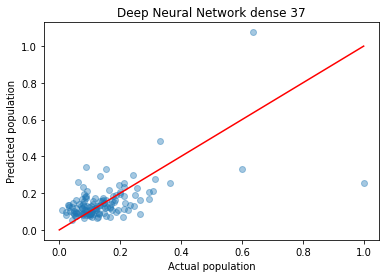

<Figure size 432x288 with 0 Axes>

In [37]:
y_predict = model.predict(x_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.plot([0,1],[0,1], c = 'red')
plt.xlabel("Actual population")
plt.ylabel("Predicted population")
plt.title("Deep Neural Network dense 37")
plt.show()
plt.savefig('DNN37.jpg')


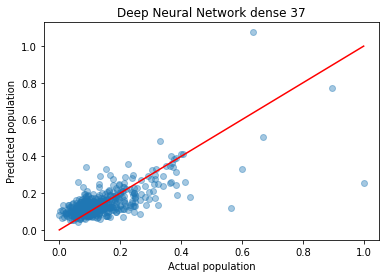

<Figure size 432x288 with 0 Axes>

In [38]:
# plot all data
y_predict = model.predict(x)

import matplotlib.pyplot as plt
plt.scatter(y, y_predict, alpha=0.4)
plt.plot([0,1],[0,1], c = 'red')
plt.xlabel("Actual population")
plt.ylabel("Predicted population")
plt.title("Deep Neural Network dense 37")
plt.show()
plt.savefig('DNN37.jpg')
